In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
from IPython.display import Image

# In this notebook

# References 

- [Introduction to statistical learning] (http://fs2.american.edu/alberto/www/analytics/ISLRLectures.html)
- [Elements of statistical learning] (https://web.stanford.edu/~hastie/ElemStatLearn/)
- [Machine learning] (https://www.coursera.org/learn/machine-learning)

# Generate synthetic data

In [13]:
m = 1001   # Number of samples 

noise = np.random.randn(m)

x = np.linspace(-5 , 5 , m, endpoint=True)   # Independent variable
b = 2                                        # Offset   
y = 3*x + b + (noise)                        # Dependent Variable 

x = x.reshape(-1,1)
y = y.reshape(-1,1)

# Plot the data

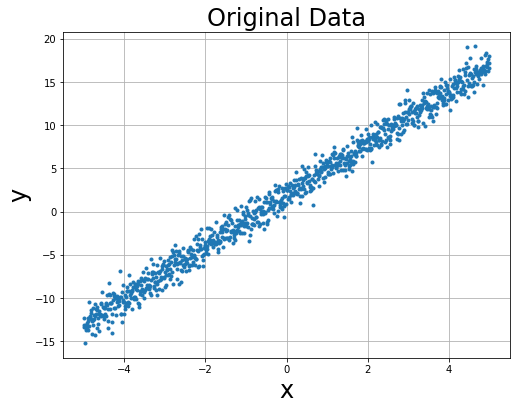

In [14]:
plt.figure(figsize=(8,6))
plt.plot(x,y, '.')
plt.title('Original Data', fontsize=24)
plt.xlabel('x', fontsize=24)
plt.ylabel('y', fontsize=24)
plt.grid()

plt.show()

# Cost function and its gradient

In [15]:
def CostGrad(y_hat, y, X):
    cost = (1/2/m)*sum((y_hat - y)**2)  # Mean squared error
    grad = (1/m)  * np.array([np.sum((y_hat - y)) , sum((y_hat - y).reshape(m,) * X[:,1:].reshape(m,))]).reshape(-1,1)
    return  cost, grad 
    

# 1) Gradient Descent 

In [16]:
N_iter = 500
alpha  = 0.01
W = (np.random.randn(2)/100).reshape(-1,1)   # Initialize weights

X = np.hstack((np.ones((m,1)), x))
cost_mon = np.zeros((N_iter,1))   # For monitoring cost 
for ii in range(N_iter):
    
    y_hat        = X@W
    cost, grad   = CostGrad(y_hat, y, X)
    W           -= alpha * grad
    cost_mon[ii] = cost
     


# 1) Plot the orginal data along with the fitted line

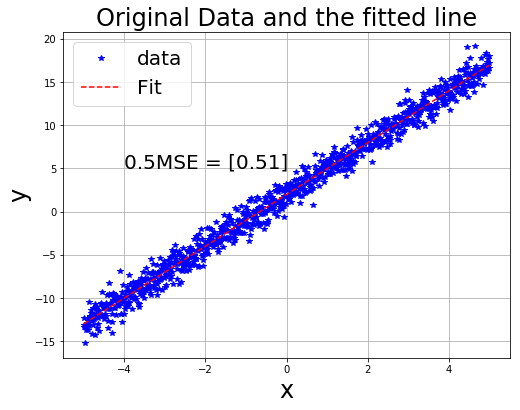

In [17]:
plt.figure(figsize=(8,6))
plt.plot(x, y, 'b*', label='data')
plt.plot(x, y_hat, 'r--', label='Fit')
plt.title('Original Data and the fitted line', fontsize=24)
plt.xlabel('x', fontsize=24)
plt.ylabel('y', fontsize=24)
plt.text(-4,5,f'0.5MSE = {np.round(cost_mon[-1],2)}', fontsize=20)
plt.grid()
plt.legend(fontsize=20)
plt.show()

# Plot the cost as a fuction of the iterations 

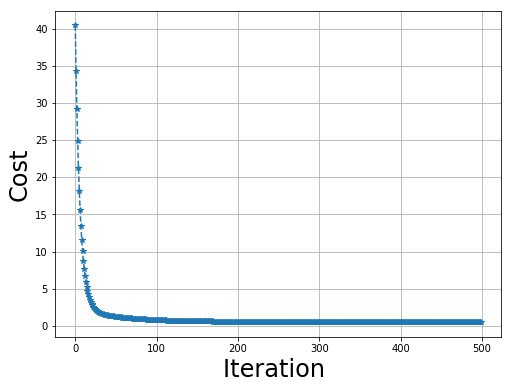

In [820]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(N_iter), cost_mon, '*--', label='data')

plt.xlabel('Iteration ', fontsize=24)
plt.ylabel('Cost', fontsize=24)
plt.grid()
plt.show()

# 2) Correlation and Variance  

In [821]:
sig_x  = np.std(x)
sig_y  = np.std(y)
mean_x = np.mean(x)
mean_y = np.mean(y)


x_stdn = (x - mean_x)/sig_x
y_stdn = (y - mean_y)/sig_y

corr  = (1/m)* np.dot(x_stdn.T,y_stdn) 

w1     = corr*sig_y/sig_x
w0     = mean_y - w1*mean_x

y_hat = w0 + w1*x 
MSE2   = (1/2/m)*sum((y_hat - y)**2) 

# 2) Plot the orginal data along with the fitted line

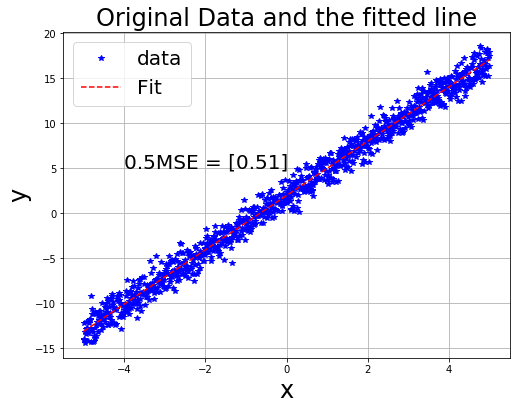

In [822]:
plt.figure(figsize=(8,6))
plt.plot(x, y, 'b*', label='data')
plt.plot(x, y_hat, 'r--', label='Fit')
plt.title('Original Data and the fitted line', fontsize=24)
plt.xlabel('x', fontsize=24)
plt.ylabel('y', fontsize=24)
plt.text(-4,5,f'0.5MSE = {np.round(MSE2,2)}', fontsize=20)
plt.grid()
plt.legend(fontsize=20)
plt.show()

# 3) Normal eqaution 

In [823]:
X = np.hstack( (np.ones((m,1)) , x)  )  
W = (np.linalg.pinv(X.T@X)@X.T) @ y

#y_hat = W[0] + W[1]*x
y_hat = X@W

# The geometry of linear regression 

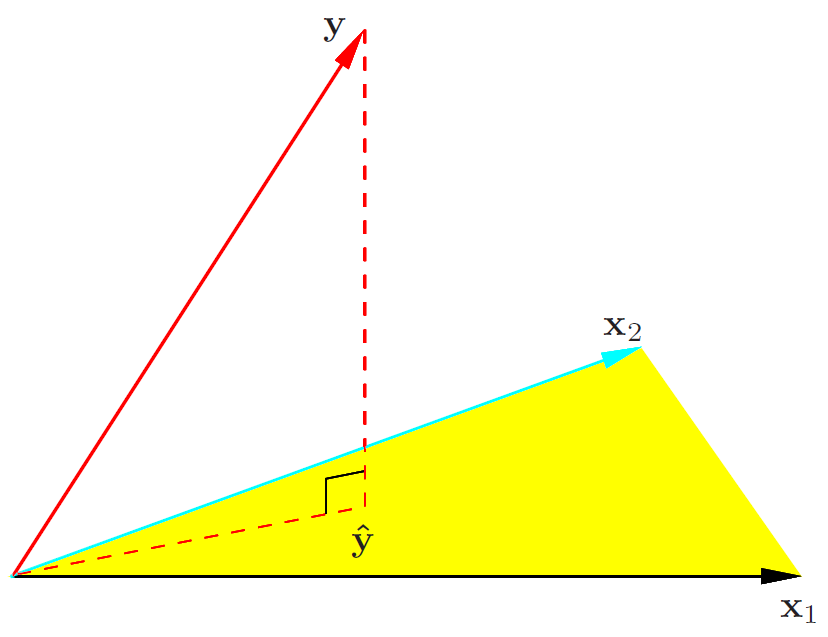

In [824]:
Image('LinearRegressionGeometry.png')

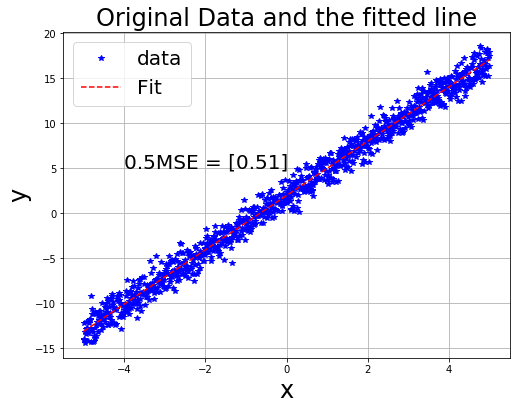

In [825]:

plt.figure(figsize=(8,6))
plt.plot(x, y, 'b*', label='data')
plt.plot(x, y_hat, 'r--', label='Fit')
plt.title('Original Data and the fitted line', fontsize=24)
plt.xlabel('x', fontsize=24)
plt.ylabel('y', fontsize=24)
plt.text(-4,5,f'0.5MSE = {np.round(MSE2,2)}', fontsize=20)
plt.grid()
plt.legend(fontsize=20)
plt.show()

# Residual plot

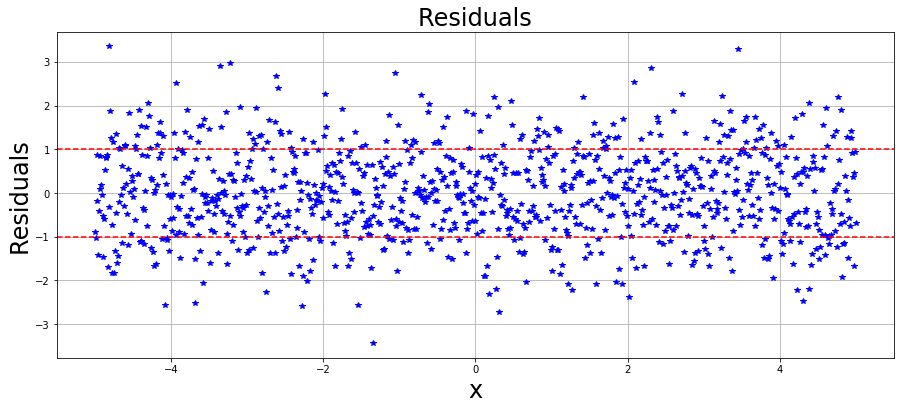

In [826]:
# Residuals 
Res = y - y_hat

# Standard error of e
VAR_Res = (1/m) * np.sum( (Res - np.mean(Res))**2 ) 
SE_Res  = np.sqrt(VAR_Res)

# Plot the data
plt.figure(figsize=(15,6))
plt.plot(x, Res, 'b*')
plt.axhline(y= SE_Res, color ='red', linestyle = '--')
plt.axhline(y= -SE_Res, color ='red', linestyle = '--')
plt.title('Residuals', fontsize=24)
plt.xlabel('x', fontsize=24)
plt.ylabel('Residuals', fontsize=24)
plt.grid()
plt.show()


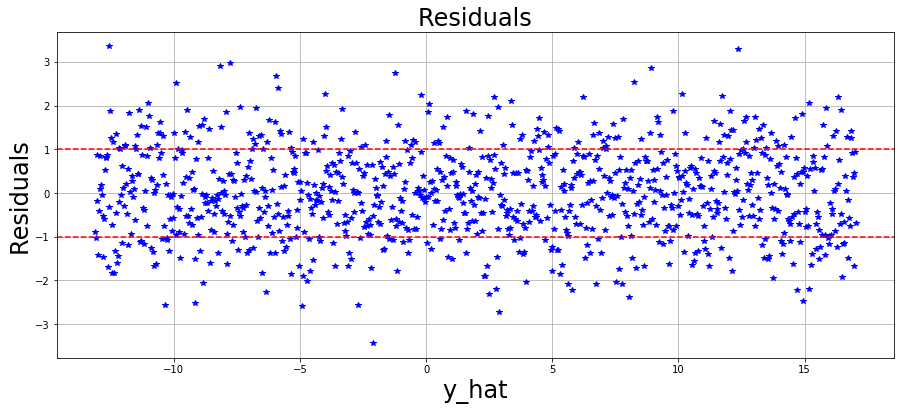

In [828]:
# Residuals 
Res = y - y_hat

# Standard error of e
VAR_Res = (1/m) * np.sum( (Res - np.mean(Res))**2 ) 
SE_Res  = np.sqrt(VAR_Res)

# Plot the data
plt.figure(figsize=(15,6))
plt.plot(y_hat, Res, 'b*')
plt.axhline(y= SE_Res, color ='red', linestyle = '--')
plt.axhline(y= -SE_Res, color ='red', linestyle = '--')
plt.title('Residuals', fontsize=24)
plt.xlabel('y_hat', fontsize=24)
plt.ylabel('Residuals', fontsize=24)
plt.grid()
plt.show()


# R2

In [338]:
RSS = np.sum( Res**2 )
TSS = np.sum( (y -np.mean(y))**2 )
R2 = 1 - RSS / TSS
print(f'R2: {R2} ')

R2: 0.9877451967150527 


### SE of w1

In [348]:
SE_w1 = np.sqrt(np.var(Res) / (np.var(x)*len(x)) )
round(SE_w1,3)

0.01

# More general

In [366]:
SE_w1 = np.sqrt(np.var(Res) * np.linalg.pinv(x.T@x))[0][0]
SE_w1 = np.sqrt(np.var(Res) * (x.T@x)**-1)[0][0]

round(SE_w1,3)

0.01

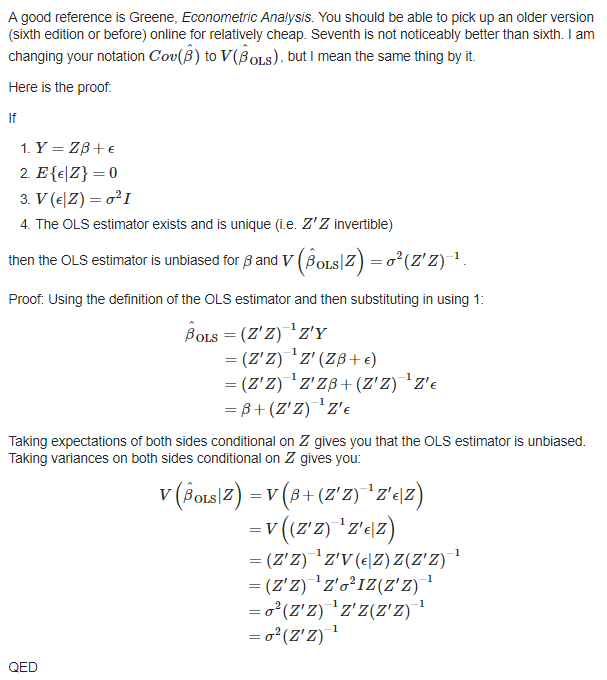

In [829]:
Image('VarCovMatrixOfParametersForLinearRegression.png')

# Confidence intervals for the learned parameters

In [247]:
# Resamples size
N_rsmp  = 1000
W1_arr = np.zeros((N_rsmp,1))
W0_arr = np.zeros((N_rsmp,1))

Xy = np.hstack((X,y))

for ii in range(N_rsmp):   # As an alternative to this method you can use the diagonal elements of the var-covar matrix of X to find var(w_i's)
   
    # Resmaple the data 
    Xy_rsmp = resample(Xy, n_samples=N_rsmp)
    X_rsmp = Xy_rsmp[:,:2]
    y_rsmp = Xy_rsmp[:,2]
    
    # Normal equation    
    W = (np.linalg.pinv(X_rsmp.T@X_rsmp)@X_rsmp.T) @ y_rsmp
    W0_arr[ii] = W[0]
    W1_arr[ii] = W[1]


# Parameters for hyp test 
confidence  = 0.95
alpha       = 1 - confidence 
    

# CI of W0
W0_sorted_arr = np.sort(W0_arr, axis=0) 
LowerW0, UpperW0  = W0_sorted_arr[int( alpha*N_rsmp/2 )] , W0_sorted_arr[int( (1-alpha/2)*N_rsmp )] 

# CI of W1
W1_sorted_arr = np.sort(W1_arr, axis=0) 
LowerW1, UpperW1  = W1_sorted_arr[int( alpha*N_rsmp/2 )] , W1_sorted_arr[int( (1-alpha/2)*N_rsmp )] 
    
    
    
print(f'W0:({round(LowerW0[0],3)} , {round(UpperW0[0],3)})', '  |  ' ,f'W1:({round(LowerW1[0], 3)} , {round(UpperW1[0], 3)})' )    

W0:(1.921 , 2.042)   |   W1:(2.979 , 3.019)


In [354]:
round((UpperW1 - LowerW1)[0],3)

0.039

### SE of w1 

In [255]:
SE_w1 = np.std(W1_arr)
round(SE_w1, 3)

0.01

# Multiple linear regression: advertising data

In [435]:
# Load the advertising data 
Ad_DF = pd.read_csv('Advertising.csv', index_col=0)
Ad_DF.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

# One by One

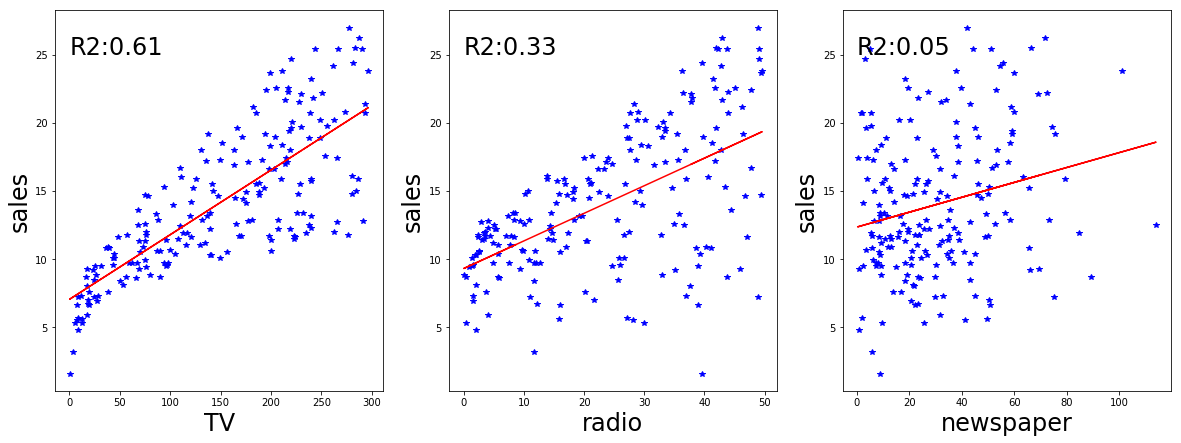

In [436]:
# Array to hold linear regression fits to each independent predictor 
y_hat_arr = np.zeros((Ad_DF.shape[0], Ad_DF.shape[1]-1 ))


fig = plt.figure(figsize=(20,7))
for cc in range(len(Ad_DF.columns)-1):
    
    x = Ad_DF[Ad_DF.columns[cc]].values.reshape(-1,1)
    y = Ad_DF[Ad_DF.columns[-1]].values.reshape(-1,1)
 
    # Linear regression 
    X = np.hstack( (np.ones((len(Ad_DF),1)) , x)  )  
    W = (np.linalg.pinv(X.T@X)@X.T) @ y
    y_hat_arr[:,cc] = W[0] + W[1]*x.reshape(-1,)       
    # Goodness of fit 
    RSS = np.sum( (y_hat_arr[:,cc].reshape(-1,1) - y)**2 ) 
    TSS = np.sum( (y-np.mean(y)) **2 )
    R2 = 1 - RSS/TSS
    
                     
    fig.add_subplot(f'13{cc+1}')
    plt.plot(x, y ,'b*' )
    plt.plot(x, y_hat_arr[:,cc] ,'r' )
    plt.text(0,25,f'R2:{round(R2,2)}', fontsize=24)
    plt.xlabel(f'{Ad_DF.columns[cc]}', fontsize = 24)
    plt.ylabel('sales', fontsize = 24)
    


# Together 

In [589]:
x = Ad_DF.iloc[:,:-1]
y = Ad_DF.iloc[:,-1].values.reshape(-1,1)
xy = pd.concat([x, Ad_DF.sales] , axis=1)

# Linear regression 
X     = np.hstack( (np.ones((len(Ad_DF),1)) , x)  )  
W     = (np.linalg.pinv(X.T@X)@X.T) @ y
y_hat = X@W       

# Goodness of fit 
RSS = np.sum( (y - y_hat.reshape(-1,1))**2 ) 
TSS = np.sum( (y-np.mean(y)) **2 )
R2 = 1 - RSS/TSS

# Variance of the residuals 
Res     = y - y_hat
var_Res = np.sum(Res**2)/(len(y) - X.shape[1] - 1)

# Fit summary and Metrics 
SE_Intercept, SE_TV, SE_radio, SE_newspaper = np.round(np.sqrt(np.diagonal(var_Res * np.linalg.pinv(X.T@X)) ), 4)
SEs = np.array([SE_Intercept, SE_TV, SE_radio, SE_newspaper])


Fit_Summary = pd.DataFrame(columns=['Coefficient', 'Standard Error'])
Fit_Summary['Coefficient'] = W.reshape(-1,)
Fit_Summary['Standard Error'] = SEs


print('R2: ', round(R2,3))
Fit_Summary

R2:  0.897


,Coefficient,Standard Error
0,2.938889,0.3127
1,0.045765,0.0014
2,0.188530,0.0086
3,-0.001037,0.0059


# Find the pairwise correlations 

In [590]:
xy_stnd = (xy - np.mean(xy , axis=0))/np.std(xy, axis=0)
round(xy_stnd.T@xy_stnd/len(xy_stnd), 3)

,TV,radio,newspaper,sales
TV,1.000,0.055,0.057,0.782
radio,0.055,1.000,0.354,0.576
newspaper,0.057,0.354,1.000,0.228
sales,0.782,0.576,0.228,1.000


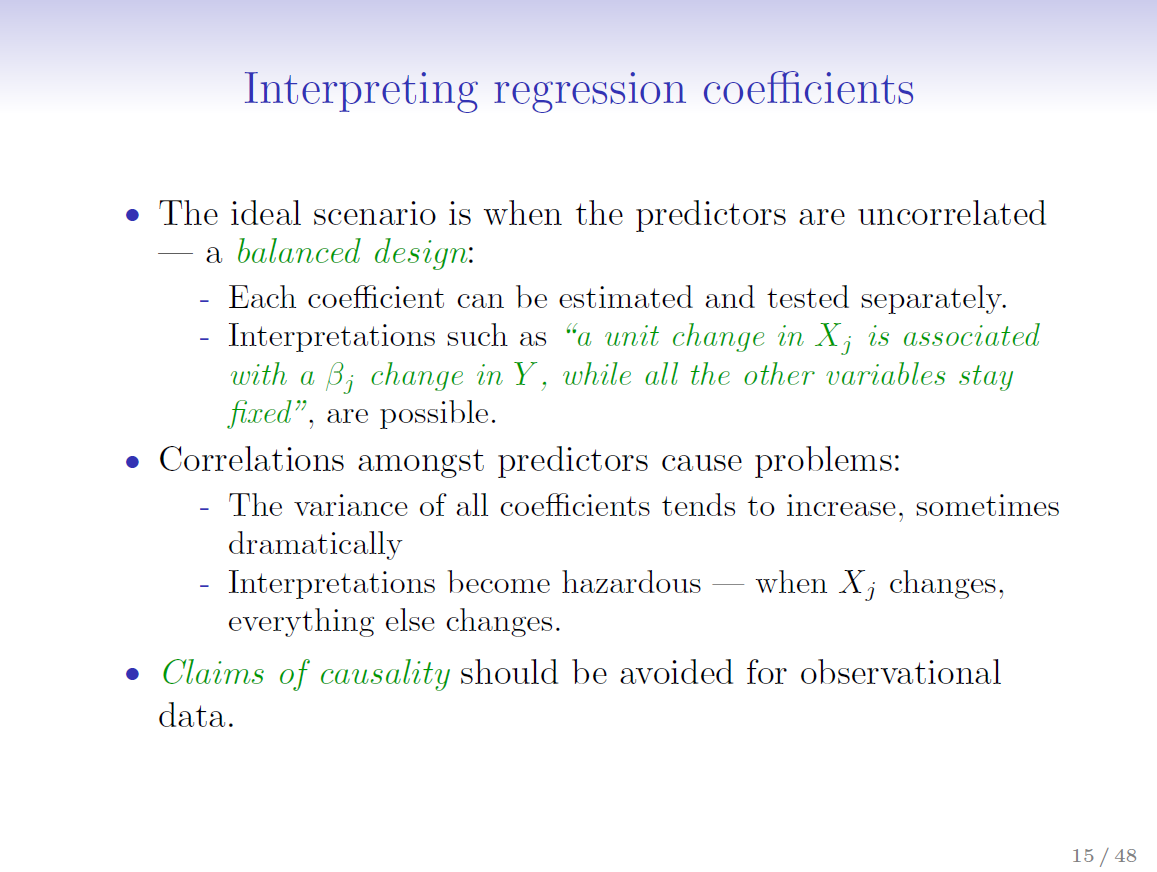

In [306]:
Image('CorrelatedPredictors.png')

# Add interaction terms 

In [591]:
Ad_DF_I = Ad_DF.iloc[:,:3]
Ad_DF_I['I_TV<->Radio'] = Ad_DF.TV * Ad_DF.radio 
Ad_DF_I_stnd = ( Ad_DF_I - Ad_DF_I.mean() ) / Ad_DF_I.std()
Ad_DF_I_stnd['sales']   = Ad_DF.sales 
Ad_DF_I['sales'] = Ad_DF.sales 

In [592]:
Ad_DF_I.head() , Ad_DF_I_stnd.head() 

(      TV  radio  newspaper  I_TV<->Radio  sales
 1  230.1   37.8       69.2       8697.78   22.1
 2   44.5   39.3       45.1       1748.85   10.4
 3   17.2   45.9       69.3        789.48    9.3
 4  151.5   41.3       58.5       6256.95   18.5
 5  180.8   10.8       58.4       1952.64   12.9,
          TV     radio  newspaper  I_TV<->Radio  sales
 1  0.967425  0.979066   1.774493      1.549501   22.1
 2 -1.194379  1.080097   0.667903     -0.518177   10.4
 3 -1.512360  1.524637   1.779084     -0.803641    9.3
 4  0.051919  1.214806   1.283185      0.823223   18.5
 5  0.393196 -0.839507   1.278593     -0.457539   12.9)

# Using standardrized data

In [593]:
x = Ad_DF_I_stnd.iloc[:,:-1]
y = Ad_DF_I_stnd.iloc[:,-1].values.reshape(-1,1)
xy = pd.concat([x, Ad_DF.sales] , axis=1)

# Linear regression 
X     = np.hstack( (np.ones((len(Ad_DF),1)) , x)  )  
W     = (np.linalg.pinv(X.T@X)@X.T) @ y
y_hat = X@W       

# Goodness of fit 
RSS = np.sum( (y - y_hat.reshape(-1,1))**2 ) 
TSS = np.sum( (y-np.mean(y)) **2 )
R2 = 1 - RSS/TSS

# Variance of the residuals 
Res = y - y_hat  # Perpendicular to the column space of X
var_Res = np.sum(Res**2) / (len(y) - X.shape[1] - 1)



# Fit summary and Metrics 
SE_Intercept, SE_TV, SE_radio, SE_newspaper, SE_TVRadio = np.round(np.sqrt(np.diagonal(var_Res * np.linalg.pinv(X.T@X)) ), 4)
SEs = np.array([SE_Intercept, SE_TV, SE_radio, SE_newspaper, SE_TVRadio])


Fit_Summary = pd.DataFrame(columns=['Coefficient', 'Standard Error'])
Fit_Summary['Coefficient'] = W.reshape(-1,)
Fit_Summary['Standard Error'] = SEs


print('R2: ', round(R2,3))
Fit_Summary

R2:  0.968


,Coefficient,Standard Error
0,14.022500,0.0670
1,1.636967,0.1299
2,0.415587,0.1361
3,0.031454,0.0720
4,3.654245,0.1771


# Using raw data

In [594]:
x = Ad_DF_I.iloc[:,:-1]
y = Ad_DF_I.iloc[:,-1].values.reshape(-1,1)
xy = pd.concat([x, Ad_DF.sales] , axis=1)

# Linear regression 
X     = np.hstack( (np.ones((len(Ad_DF),1)) , x)  )  
W     = (np.linalg.pinv(X.T@X)@X.T) @ y
y_hat = X@W       

# Goodness of fit 
RSS = np.sum( (y - y_hat.reshape(-1,1))**2 ) 
TSS = np.sum( (y-np.mean(y)) **2 )
R2 = 1 - RSS/TSS

# Variance of the residuals 
Res = y - y_hat  # Perpendicular to the column space of X
var_Res = np.sum(Res**2) / (len(y) - X.shape[1] - 1)


# Fit summary and Metrics 
SE_Intercept, SE_TV, SE_radio, SE_newspaper, SE_TVRadio = np.round(np.sqrt(np.diagonal(var_Res * np.linalg.pinv(X.T@X)) ), 4)
SEs = np.array([SE_Intercept, SE_TV, SE_radio, SE_newspaper, SE_TVRadio])


Fit_Summary = pd.DataFrame(columns=['Coefficient', 'Standard Error'])
Fit_Summary['Coefficient'] = W.reshape(-1,)
Fit_Summary['Standard Error'] = SEs


print('R2: ', round(R2,3))
Fit_Summary

R2:  0.968


,Coefficient,Standard Error
0,6.728412,0.2540
1,0.019067,0.0015
2,0.027992,0.0092
3,0.001444,0.0033
4,0.001087,0.0001


# Credit card data: categorical variables 

In [463]:
# Load the credit data 
Credit_DF = pd.read_csv('Credit.csv', index_col=0)
Credit_DF.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


### Analyze the effect of gender 

In [581]:
gender_cat_dumm = pd.get_dummies(Credit_DF.Gender)
gender_cat_dumm.head()

,Female,Male
1,0,1
2,1,0
3,0,1
4,1,0
5,0,1


In [582]:
Credit_gender = gender_cat_dumm
Credit_gender['Balance'] = Credit_DF.Balance
Credit_gender.drop('Male', axis = 1 , inplace=True)
Credit_gender.head()

,Female,Balance
1,0,333
2,1,903
3,0,580
4,1,964
5,0,331


In [595]:
x = Credit_gender.iloc[:,:-1]
y = Credit_gender.iloc[:,-1].values.reshape(-1,1)
xy = pd.concat([x, Credit_gender.Balance] , axis=1)

# Linear regression 
X     = np.hstack( (np.ones((len(Credit_gender),1)) , x)  )  
W     = (np.linalg.pinv(X.T@X)@X.T) @ y
y_hat = X@W       

# Goodness of fit 
RSS = np.sum( (y - y_hat.reshape(-1,1))**2 ) 
TSS = np.sum( (y-np.mean(y)) **2 )
R2  = 1 - RSS/TSS
# Variance of the residuals 
Res     = y - y_hat
var_Res = np.sum(Res**2) / (len(y) - x.shape[1] - 1)


# Fit summary and Metrics 
SE_Intercept, SE_Female = np.round(np.sqrt(np.diagonal(var_Res * np.linalg.pinv(X.T@X))) , 4)

SEs = np.array([SE_Intercept, SE_Female])


Fit_Summary = pd.DataFrame(columns=['Coefficient', 'Standard Error'])
Fit_Summary['Coefficient'] = W.reshape(-1,)
Fit_Summary['Standard Error'] = SEs


print('R2: ', round(R2,3))
Fit_Summary

R2:  0.0


,Coefficient,Standard Error
0,509.803109,33.1281
1,19.733123,46.0512


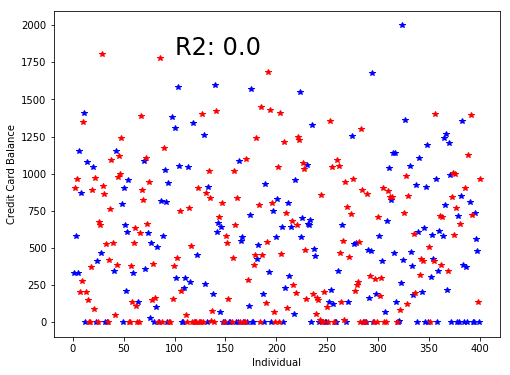

In [489]:
plt.figure(figsize=(8,6))
plt.plot(Credit_gender.Balance[Credit_gender.Male==1],'b*')
plt.plot(Credit_gender.Balance[Credit_gender.Female==1],'r*')
plt.xlabel('Individual')
plt.ylabel('Credit Card Balance')
plt.text(100,1800,'R2: 0.0', fontsize=24)
plt.show()

# Analyze the effect of ethnicity 

In [703]:
eth_cat_dumm = pd.get_dummies(Credit_DF.Ethnicity)
print(eth_cat_dumm.head())

Credit_eth = eth_cat_dumm
Credit_eth['Balance'] = Credit_DF.Balance
Credit_eth.drop('African American', axis = 1, inplace = True)
Credit_eth.head()

   African American  Asian  Caucasian
1                 0      0          1
2                 0      1          0
3                 0      1          0
4                 0      1          0
5                 0      0          1


,Asian,Caucasian,Balance
1,0,1,333
2,1,0,903
3,1,0,580
4,1,0,964
5,0,1,331


# Linear regression for credit card balance: ethnicity

In [704]:
x  = Credit_eth.iloc[:,:-1]
y  = Credit_eth.iloc[:,-1].values.reshape(-1,1)
xy = pd.concat([x, Credit_eth.Balance] , axis=1)

# Linear regression 
X     = np.hstack( (np.ones((len(Credit_eth),1)) , x)  )  
W     = (np.linalg.pinv(X.T@X)@X.T) @ y
y_hat = X@W       

# Goodness of fit 
RSS = np.sum( (y - y_hat.reshape(-1,1))**2 ) 
TSS = np.sum( (y-np.mean(y)) **2 )
R2  = 1 - RSS/TSS

# Variance of the residuals 
Res = y - y_hat
var_Res = np.sum(Res**2) / (len(y) - x.shape[1] - 1)




# Fit summary and Metrics 
SE_Intercept , SE_Asian, SE_Caucasian = np.round(np.sqrt( np.diagonal(var_Res * np.linalg.pinv(X.T@X))   ), 4)
SEs = np.array([SE_Intercept, SE_Asian, SE_Caucasian])


Fit_Summary = pd.DataFrame(columns=['Coefficient', 'Standard Error'])
Fit_Summary['Coefficient'] = W.reshape(-1,)
Fit_Summary['Standard Error'] = SEs


print('R2: ', round(R2,3))
Fit_Summary

R2:  0.0


,Coefficient,Standard Error
0,531.000000,46.3187
1,-18.686275,65.0211
2,-12.502513,56.6810


# Interaction between categorical and quantitative variables : student status & income 

In [710]:
student_cat_dumm = pd.get_dummies(Credit_DF.Student)
print(student_cat_dumm.head())

Credit_Income                 = student_cat_dumm
Credit_Income['Income']       = Credit_DF.Income
Credit_Income['Balance']      = Credit_DF.Balance
Credit_Income.drop('No', axis = 1, inplace = True)
Credit_Income.head()

   No  Yes
1   1    0
2   0    1
3   1    0
4   1    0
5   1    0


,Yes,Income,Balance
1,0,14.891,333
2,1,106.025,903
3,0,104.593,580
4,0,148.924,964
5,0,55.882,331


### Linear Regression without interaction

In [716]:
x  = Credit_Income.iloc[:,:-1]                         # Choose students i.e. Yes==1 
y  = Credit_Income.iloc[:,-1].values.reshape(-1,1)
xy = pd.concat([x, Credit_Income[Credit_Income.Yes==1].Balance] , axis=1)

# Linear regression 
X     = np.hstack( (np.ones((len(Credit_Income),1)) , x)  )  
W     = (np.linalg.pinv(X.T@X)@X.T) @ y
y_hat = X@W       


# For students 
x_Student_Fit = Credit_Income[Credit_Income.Yes==1].Income
X_Student     = np.hstack( (np.ones((len(x[x['Yes']==1]),1)) , x[x['Yes']==1])  )  
Student_Fit   = X_Student@W


# For non-students
x_NonStudent_Fit = Credit_Income[Credit_Income.Yes==0].Income
X_NonStudent     = np.hstack( (np.ones((len(x[x['Yes']==0]),1)) , x[x['Yes']==0])  )  
NonStudent_Fit   = X_NonStudent@W



# Goodness of fit 
RSS = np.sum( (y - y_hat.reshape(-1,1))**2 ) 
TSS = np.sum( (y-np.mean(y)) **2 )
R2  = 1 - RSS/TSS

# Variance of the residuals 
Res = y - y_hat
var_Res = np.sum(Res**2) /(len(y) - X.shape[1] -1 )

# Fit summary and Metrics 
SE_Intercept, SE_Student, SE_Income,  = np.round(np.sqrt(np.diagonal(np.var(Res) * np.linalg.pinv(X.T@X)) )  , 4)
SEs = np.array([SE_Intercept,  SE_Student, SE_Income])


Fit_Summary = pd.DataFrame(columns=['Coefficient', 'Standard Error'])
Fit_Summary['Coefficient'] = W.reshape(-1,)
Fit_Summary['Standard Error'] = SEs


print('R2: ', round(R2,3))
Fit_Summary

R2:  0.277


,Coefficient,Standard Error
0,211.142964,32.3353
1,382.670539,65.0654
2,5.984336,0.5545


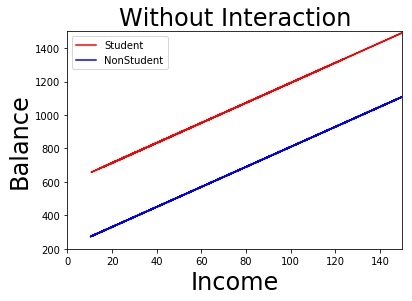

In [712]:
plt.plot(x_Student_Fit, Student_Fit, 'r', label='Student')
plt.plot(x_NonStudent_Fit, NonStudent_Fit, 'b', label='NonStudent')

plt.legend()
plt.xlabel('Income', fontsize=24)
plt.ylabel('Balance', fontsize=24)
plt.title('Without Interaction', fontsize=24)
plt.xlim([0,150])
plt.ylim([200, 1500])  
plt.show()

### Linear Regression with interaction: method 1: Fit isolated (student and non-student) data

In [713]:
x  = Credit_Income[Credit_Income.Yes==1].drop('Yes', axis=1).iloc[:,:-1]                         # Choose students i.e. Yes==1 
y  = Credit_Income[Credit_Income.Yes==1].drop('Yes', axis=1).iloc[:,-1].values.reshape(-1,1)
xy = pd.concat([x, Credit_Income[Credit_Income.Yes==1].Balance] , axis=1)

# Linear regression 
X     = np.hstack( (np.ones((len(y),1)) , x)  )  
W     = (np.linalg.pinv(X.T@X)@X.T) @ y
y_hat = X@W

x_Student_Fit = x.Income
Student_Fit = y_hat 

# Goodness of fit 
RSS = np.sum( (y - y_hat.reshape(-1,1))**2 ) 
TSS = np.sum( (y-np.mean(y)) **2 )
R2  = 1 - RSS/TSS

# Variance of the residuals 
Res = y - y_hat
var_Res = np.sum(Res**2) /(len(y) - X.shape[1] -1 )

# Fit summary and Metrics 
SE_Intercept, SE_Income,  = np.round(np.sqrt(np.diagonal(np.var(Res) * np.linalg.pinv(X.T@X)) )  , 4)
SEs = np.array([SE_Intercept, SE_Income])


Fit_Summary = pd.DataFrame(columns=['Coefficient', 'Standard Error'])
Fit_Summary['Coefficient'] = W.reshape(-1,)
Fit_Summary['Standard Error'] = SEs


print('R2: ', round(R2,3))
print(Fit_Summary)

# ====================================================================================================
x  = Credit_Income[Credit_Income.Yes==0].drop('Yes', axis=1).iloc[:,:-1]     # Fit model for students 
y  = Credit_Income[Credit_Income.Yes==0].drop('Yes', axis=1).iloc[:,-1].values.reshape(-1,1)
xy = pd.concat([x, Credit_Income[Credit_Income.Yes==0].Balance] , axis=1)

# Linear regression 
X     = np.hstack( (np.ones((len(y),1)) , x)  )  
W     = (np.linalg.pinv(X.T@X)@X.T) @ y
y_hat = X@W     

x_NonStudent_Fit = x.Income
NonStudent_Fit = y_hat 

# Goodness of fit 
RSS = np.sum( (y - y_hat.reshape(-1,1))**2 ) 
TSS = np.sum( (y-np.mean(y)) **2 )
R2  = 1 - RSS/TSS

# Variance of the residuals 
Res = y - y_hat
var_Res = np.sum(Res**2) /(len(y) - X.shape[1] -1 )

# Fit summary and Metrics 
SE_Intercept, SE_Income,  = np.round(np.sqrt(np.diagonal(np.var(Res) * np.linalg.pinv(X.T@X)) )  , 4)
SEs = np.array([SE_Intercept, SE_Income])


Fit_Summary = pd.DataFrame(columns=['Coefficient', 'Standard Error'])
Fit_Summary['Coefficient'] = W.reshape(-1,)
Fit_Summary['Standard Error'] = SEs

print('-'*30)
print('R2: ', round(R2,3))
print(Fit_Summary)

R2:  0.11
   Coefficient  Standard Error
0   677.298996        115.0984
1     4.219018          1.8960
------------------------------
R2:  0.244
   Coefficient  Standard Error
0   200.623153         32.8293
1     6.218169          0.5768


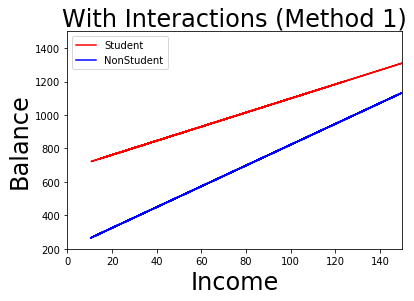

In [728]:
plt.plot(x_Student_Fit, Student_Fit, 'r', label='Student')
plt.plot(x_NonStudent_Fit, NonStudent_Fit, 'b', label='NonStudent')

plt.legend()
plt.xlabel('Income', fontsize=24)
plt.ylabel('Balance', fontsize=24)
plt.title('With Interactions (Method 1)', fontsize=24)
plt.xlim([0,150])
plt.ylim([200, 1500])  
plt.show()

### Linear Regression with interaction: method 2: Fit the whole (student and non-student) data but include the interaction term

In [717]:
student_cat_dumm = pd.get_dummies(Credit_DF.Student)
print(student_cat_dumm.head())

Credit_I                       = student_cat_dumm
Credit_I['Income']             = Credit_DF.Income
Credit_I['I_Student<->Income'] = Credit_I.Yes * Credit_DF.Income
Credit_I['Balance']            = Credit_DF.Balance
Credit_I.drop('No', axis = 1, inplace = True)
Credit_I.head()

   No  Yes
1   1    0
2   0    1
3   1    0
4   1    0
5   1    0


,Yes,Income,I_Student<->Income,Balance
1,0,14.891,0.000,333
2,1,106.025,106.025,903
3,0,104.593,0.000,580
4,0,148.924,0.000,964
5,0,55.882,0.000,331


In [719]:
x  = Credit_I.iloc[:,:-1]                         # Choose students i.e. Yes==1 
y  = Credit_I.iloc[:,-1].values.reshape(-1,1)
xy = pd.concat([x, Credit_I[Credit_I.Yes==1].Balance] , axis=1)

# Linear regression 
X     = np.hstack( (np.ones((len(Credit_I),1)) , x)  )  
W     = (np.linalg.pinv(X.T@X)@X.T) @ y
y_hat = X@W       


# For students =====================================================================
x_Student_Fit = Credit_I[Credit_I.Yes==1].Income
X_Student     = np.hstack( (np.ones((len(x[x['Yes']==1]),1)) , x[x['Yes']==1])  )  
Student_Fit   = X_Student@W


# For non-students =================================================================
x_NonStudent_Fit = Credit_I[Credit_I.Yes==0].Income
X_NonStudent     = np.hstack( (np.ones((len(x[x['Yes']==0]),1)) , x[x['Yes']==0])  )  
NonStudent_Fit   = X_NonStudent@W



# Goodness of fit 
RSS = np.sum( (y - y_hat.reshape(-1,1))**2 ) 
TSS = np.sum( (y-np.mean(y)) **2 )
R2  = 1 - RSS/TSS

# Variance of the residuals 
Res = y - y_hat
var_Res = np.sum(Res**2) /(len(y) - X.shape[1] -1 )

# Fit summary and Metrics 
SE_Intercept, SE_Student, SE_Income, SE_StudentIncome  = np.round(np.sqrt(np.diagonal(np.var(Res) * np.linalg.pinv(X.T@X)) )  , 4)
SEs = np.array([SE_Intercept,  SE_Student, SE_Income, SE_StudentIncome])


Fit_Summary = pd.DataFrame(columns=['Coefficient', 'Standard Error'])
Fit_Summary['Coefficient'] = W.reshape(-1,)
Fit_Summary['Standard Error'] = SEs


print('R2: ', round(R2,3))
Fit_Summary

R2:  0.28


,Coefficient,Standard Error
0,200.623153,33.5295
1,476.675843,103.8282
2,6.218169,0.5891
3,-1.999151,1.7226


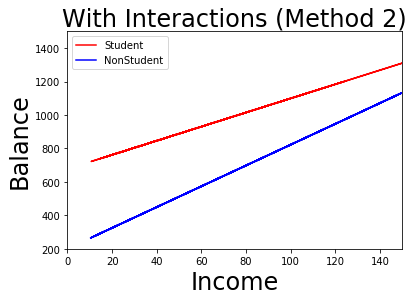

In [729]:
plt.plot(x_Student_Fit, Student_Fit, 'r', label='Student')
plt.plot(x_NonStudent_Fit, NonStudent_Fit, 'b', label='NonStudent')

plt.legend()
plt.xlabel('Income', fontsize=24)
plt.ylabel('Balance', fontsize=24)
plt.title('With Interactions (Method 2)', fontsize=24)
plt.xlim([0,150])
plt.ylim([200, 1500])  
plt.show()

# Including non-linear effects in linear models 

###  Auto Data

In [831]:
# Load the advertising data 
Auto_DF = pd.read_csv('Auto.csv', index_col=0).reset_index()
Auto_DF = Auto_DF[Auto_DF.horsepower!='?']
Auto_DF.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [832]:
Auto_NonLin                     = pd.DataFrame(columns=['horsepower','horsepower2','Miles Per Gallon'])
Auto_NonLin['horsepower']       = Auto_DF['horsepower'].astype(int)
Auto_NonLin['horsepower2']      = Auto_NonLin['horsepower']**2 
Auto_NonLin['Miles Per Gallon'] = Auto_DF.mpg
Auto_NonLin.head()

,horsepower,horsepower2,Miles Per Gallon
0,130,16900,18.0
1,165,27225,15.0
2,150,22500,18.0
3,150,22500,16.0
4,140,19600,17.0


In [833]:
x  = Auto_NonLin.iloc[:,:-1]                         # Choose students i.e. Yes==1 
y  = Auto_NonLin.iloc[:,-1].values.reshape(-1,1)
xy = pd.concat([x, Auto_NonLin['Miles Per Gallon']] , axis=1)

# Linear regression 
X     = np.hstack( (np.ones((len(Auto_NonLin),1)) , x)  )  
W     = (np.linalg.pinv(X.T@X)@X.T) @ y
y_hat = X@W       


# Goodness of fit 
RSS = np.sum( (y - y_hat.reshape(-1,1))**2 ) 
TSS = np.sum( (y-np.mean(y)) **2 )
R2  = 1 - RSS/TSS

# Variance of the residuals 
Res = y - y_hat
var_Res = np.sum(Res**2) /(len(y) - X.shape[1] -1 )

# Fit summary and Metrics 
SE_Intercept, SE_horsepower, SE_horsepower2  = np.round(np.sqrt(np.diagonal(np.var(Res) * np.linalg.pinv(X.T@X)) )  , 4)
SEs = np.array([SE_Intercept, SE_horsepower, SE_horsepower2])


Fit_Summary = pd.DataFrame(columns=['Coefficient', 'Standard Error'])
Fit_Summary['Coefficient'] = W.reshape(-1,)
Fit_Summary['Standard Error'] = SEs


print('R2: ', round(R2,3))
Fit_Summary

R2:  0.688


,Coefficient,Standard Error
0,56.900100,1.7935
1,-0.466190,0.0310
2,0.001231,0.0001


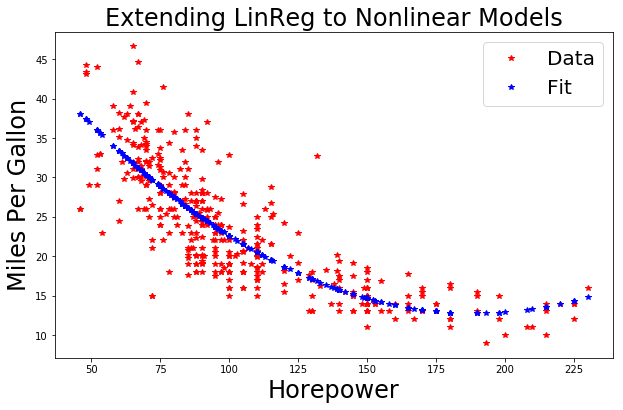

In [837]:
plt.figure(figsize=(10,6))

plt.plot(Auto_NonLin.horsepower, Auto_NonLin['Miles Per Gallon'], 'r*', label='Data')
plt.plot(Auto_NonLin.horsepower, y_hat, 'b*', label='Fit')


plt.xlabel('Horepower', fontsize=24)
plt.ylabel('Miles Per Gallon', fontsize=24)
plt.title('Extending LinReg to Nonlinear Models', fontsize=24)
plt.legend(fontsize=20)
plt.show()